# DBSCAN Clustering


DBSCAN Advantage - 
* great at sepearating clusters of high density versus clusters of low density
* great with handling outliers within the dataset <br>

Disadvantage - 
* doestn't work well with clusters of varying densities whereas it's great at seperating high density clusters from low density clusters. struggle with clusters of similar densitydata
* struggles with high dimensionality 


--Supporting youtube vides https://www.youtube.com/watch?v=C3r7tGRe2eI

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import DBSCAN
from sklearn import metrics
from pylab import rcParams
rcParams['figure.figsize'] = 14,6

In [2]:
# Importing the dataset
df = pd.read_csv('/content/Mall_Customers.csv')
df.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
7,8,Female,23,18,94
28,29,Female,40,29,31
153,154,Female,38,78,76
79,80,Female,49,54,42
63,64,Female,54,47,59
154,155,Female,47,78,16
186,187,Female,54,101,24
131,132,Male,39,71,75
103,104,Male,26,62,55
173,174,Male,36,87,92


Let's pick up Annual Income and Spending Score features for clustering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


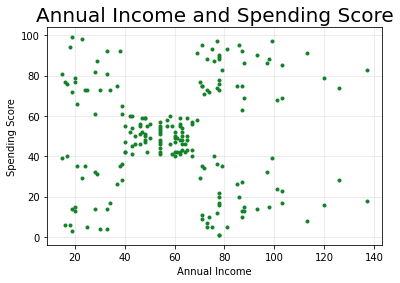

In [4]:

plt.plot(df['Annual Income (k$)'], df['Spending Score (1-100)'],
           marker = '.', linewidth=0, color='#128128')
plt.grid(which='major', color='#cccccc', alpha = 0.45)
plt.title('Annual Income and Spending Score', family='Arial', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [5]:
X = df.iloc[:, [3, 4]].values
X[0:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

#Apply DBSCAN Algorithm

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
dbscan = DBSCAN(eps=3, min_samples=4)

# Fitting the model

In [8]:
model = dbscan.fit(X)
model

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [9]:
labels = model.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

* -ve points represents the outliers they do not fall under any cluster
* others denote the cluster 0th, 1th, 2th,...8th cluster

#Visualize results

Seperate outliers from clusters data

In [10]:
outliers_df = df[model.labels_== -1] #-1 stands for outlier
clusters_df = df[model.labels_ !=-1]

In [11]:
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              121 non-null    int64 
 1   Genre                   121 non-null    object
 2   Age                     121 non-null    int64 
 3   Annual Income (k$)      121 non-null    int64 
 4   Spending Score (1-100)  121 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 5.7+ KB


In [12]:
clusters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 56 to 176
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              79 non-null     int64 
 1   Genre                   79 non-null     object
 2   Age                     79 non-null     int64 
 3   Annual Income (k$)      79 non-null     int64 
 4   Spending Score (1-100)  79 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.7+ KB


In [13]:
colors = model.labels_
colors_clusters = colors[colors != -1]
colors_outliers = 'black' # for outliers set black color

#core points, number of clusters

In [14]:
#Get the info about clusters
clusters = Counter(model.labels_)
print(clusters)
print(df[model.labels_ == -1].head(10))
print('Number of clusters = {}'.format(len(clusters)-1))

Counter({-1: 121, 2: 28, 1: 15, 0: 10, 4: 6, 3: 4, 5: 4, 6: 4, 7: 4, 8: 4})
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72
Number of clusters = 9


#Plot clusters and outliers

In [15]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


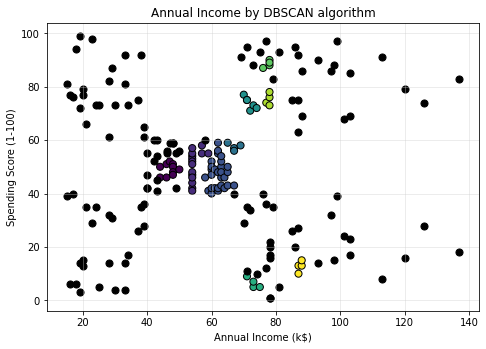

In [16]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.scatter(clusters_df['Annual Income (k$)'], clusters_df['Spending Score (1-100)'],
           c = colors_clusters, edgecolors='black', s=50)
ax.scatter(outliers_df['Annual Income (k$)'], outliers_df['Spending Score (1-100)'],
           c = colors_outliers, edgecolors='black', s=50)

ax.set_xlabel('Annual Income (k$)', family='Arial', fontsize=10)
ax.set_ylabel('Spending Score (1-100)', family='Arial', fontsize=10) 

plt.title('Annual Income by DBSCAN algorithm', family='Arial', fontsize=12)

plt.grid(which='major', color='#cccccc', alpha = 0.45)
plt.show()

In [17]:
print(metrics.silhouette_score(X,labels))

-0.1908319132560097
